# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1


In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [6]:
#randomly sampling 10000 points
X_p = project_data[project_data['project_is_approved']==1].sample(frac = 0.2)
X_n = project_data[project_data['project_is_approved']==0].sample(frac = 1)
project_data = pd.concat([X_p,X_n])

In [7]:
project_data.shape

(35083, 17)

In [8]:
project_data[project_data['project_is_approved']==1].count()

Unnamed: 0                                      18541
id                                              18541
teacher_id                                      18541
teacher_prefix                                  18540
school_state                                    18541
Date                                            18541
project_grade_category                          18541
project_subject_categories                      18541
project_subject_subcategories                   18541
project_title                                   18541
project_essay_1                                 18541
project_essay_2                                 18541
project_essay_3                                   628
project_essay_4                                   628
project_resource_summary                        18541
teacher_number_of_previously_posted_projects    18541
project_is_approved                             18541
dtype: int64

In [9]:
project_data[project_data['project_is_approved']==0].count()

Unnamed: 0                                      16542
id                                              16542
teacher_id                                      16542
teacher_prefix                                  16542
school_state                                    16542
Date                                            16542
project_grade_category                          16542
project_subject_categories                      16542
project_subject_subcategories                   16542
project_title                                   16542
project_essay_1                                 16542
project_essay_2                                 16542
project_essay_3                                   504
project_essay_4                                   504
project_resource_summary                        16542
teacher_number_of_previously_posted_projects    16542
project_is_approved                             16542
dtype: int64

## 1.2 preprocessing of `project_subject_categories`

In [10]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [11]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [12]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [13]:
project_data = project_data.drop(['project_essay_1','project_essay_2','project_essay_3','project_essay_4'],axis=1)

In [14]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
72511,167849,p021272,9bb81d54ea23ff99413a140f17844b6f,Ms.,AZ,2017-01-16 15:55:38,Grades PreK-2,More Technology In the Classroom,My students need more technology in the classr...,1,1,Literacy_Language Math_Science,Literacy Mathematics,"Hi everyone, my students are in a self-contain..."
99557,39634,p087360,3551aa80b2fb43ec49e995120832c52d,Mrs.,MN,2016-05-12 15:29:48,Grades 6-8,"We all agree, TI-83's are what we need!",My students need TI-83 Graphing Calculators to...,0,1,Math_Science,Mathematics,"MATH MATH MATH\r\n\""We are each uni..."


#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [15]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)


Hi everyone, my students are in a self-contained classroom called PALS in the Tempe School District. They are hard working students and they try their best everyday. They struggle academically, but they have made many gains in reading and math. They absolutely love using technology, such as; IPADS, computers and the smartboard in the classroom. \r\n\r\nMy students love ABC Mouse, Starfall, phonics games and math games on the smartboard and the computer. They are so tech savvy and they love using my Ipad. They have made tremendous academic growth and I can't wait to see how much further they grow this year.The Kindles would benefit my students because they would be able to be independent during a reading group or during free time. There are so many wonderful apps for my students to use. There are fantastic reading apps such as, read me stories, ABC mouse and sight words learning games. These applications will benefit my students by helping them read and comprehend stories. \r\nMy studen

In [16]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [17]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

As a teacher in a low-income/high poverty elementary school, my students are faced with many challenges both in school and at home that children should not have to be faced with. Despite the many challenges they face and overcome, I strive to provide them with a safe and supportive optimal learning environment. \r\n\r\nMy students come in daily excited to learn and ready to start a fresh new day! I want to provide them with as much support to help them \"grow their brains!\"Being a teacher in a low socioeconomic area, the challenge to make learning fun and engaging is ongoing. Any hands on materials and/or manipulatives that I can provide for my class to help keep them actively engaged in learning will provide an optimal learning experience for the entire class! \r\nStudies have proven for many years that there are several different learning styles that we all find successful. Being able to provide hands on learning will continue to reach out to my kinesthetic learners, providing a bro

In [18]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

As a teacher in a low-income/high poverty elementary school, my students are faced with many challenges both in school and at home that children should not have to be faced with. Despite the many challenges they face and overcome, I strive to provide them with a safe and supportive optimal learning environment.     My students come in daily excited to learn and ready to start a fresh new day! I want to provide them with as much support to help them  grow their brains! Being a teacher in a low socioeconomic area, the challenge to make learning fun and engaging is ongoing. Any hands on materials and/or manipulatives that I can provide for my class to help keep them actively engaged in learning will provide an optimal learning experience for the entire class!   Studies have proven for many years that there are several different learning styles that we all find successful. Being able to provide hands on learning will continue to reach out to my kinesthetic learners, providing a broader ran

In [19]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

As a teacher in a low income high poverty elementary school my students are faced with many challenges both in school and at home that children should not have to be faced with Despite the many challenges they face and overcome I strive to provide them with a safe and supportive optimal learning environment My students come in daily excited to learn and ready to start a fresh new day I want to provide them with as much support to help them grow their brains Being a teacher in a low socioeconomic area the challenge to make learning fun and engaging is ongoing Any hands on materials and or manipulatives that I can provide for my class to help keep them actively engaged in learning will provide an optimal learning experience for the entire class Studies have proven for many years that there are several different learning styles that we all find successful Being able to provide hands on learning will continue to reach out to my kinesthetic learners providing a broader range for success for

In [20]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [21]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████████| 35083/35083 [00:40<00:00, 863.79it/s]


<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [22]:
# similarly you can preprocess the titles also
project_data['project_title'].head(2)

72511           More Technology In the Classroom
99557    We all agree, TI-83's are what we need!
Name: project_title, dtype: object

In [23]:
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])
print("="*50)
print(project_data['project_title'].values[10])
print("="*50)
print(project_data['project_title'].values[100])
print("="*50)
print(project_data['project_title'].values[1500])
print("="*50)


More Technology In the Classroom
Starting the Year Off Fresh and New!
STEAM Learning & Minecraft!
Privacy Please!
Improve Science and Math by Reading
An Individual Whiteboard Provides an Endless Amount of Solutions


In [24]:
preprocessed_titles = []

# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 35083/35083 [00:01<00:00, 18592.61it/s]


In [25]:
preprocessed_titles = pd.DataFrame(preprocessed_titles)
project_data['project_title'] = preprocessed_titles
project_data['project_title'].head(10)

72511                                   NaN
99557                                   NaN
81479                                   NaN
49588                                   NaN
30974    el escape cubano a spanish 1 novel
87066                                   NaN
95780                                   NaN
9724      wobbling dancing keeps us healthy
23122                      imaginative play
88993                                   NaN
Name: project_title, dtype: object

In [26]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [27]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [28]:
project_data.count()

Unnamed: 0                                      35083
id                                              35083
teacher_id                                      35083
teacher_prefix                                  35082
school_state                                    35083
Date                                            35083
project_grade_category                          35083
project_title                                   11283
project_resource_summary                        35083
teacher_number_of_previously_posted_projects    35083
project_is_approved                             35083
clean_categories                                35083
clean_subcategories                             35083
essay                                           35083
price                                           35083
quantity                                        35083
dtype: int64

In [29]:
project_data['project_title'] = project_data['project_title'].fillna('')

# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. K Nearest Neighbor</h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [30]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'],axis=1)
X=project_data

In [31]:
#https://pythonprogramminglanguage.com/training-and-test-data/
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
X_train , X_cv, y_train, y_cv = train_test_split(X_train,y_train,test_size=0.3)

In [32]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)



(17190, 16) (17190,)
(7368, 16) (7368,)
(10525, 16) (10525,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [33]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)
print(vectorizer.get_feature_names())

categories_one_hot_train = vectorizer.transform(X_train['clean_categories'].values)
print("Shape of matrix after one hot encoding ",categories_one_hot_train.shape)
categories_one_hot_test = vectorizer.transform(X_test['clean_categories'].values)
print("Shape of matrix after one hot encoding ",categories_one_hot_test.shape)
categories_one_hot_cv = vectorizer.transform(X_cv['clean_categories'].values)
print("Shape of matrix after one hot encoding ",categories_one_hot_cv.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encoding  (17190, 9)
Shape of matrix after one hot encoding  (10525, 9)
Shape of matrix after one hot encoding  (7368, 9)


In [34]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot_train = vectorizer.transform(X_train['clean_subcategories'].values)
print("Shape of matrix after one hot encoding ",sub_categories_one_hot_train.shape)
sub_categories_one_hot_cv = vectorizer.transform(X_cv['clean_subcategories'].values)
print("Shape of matrix after one hot encoding ",sub_categories_one_hot_cv.shape)
sub_categories_one_hot_test = vectorizer.transform(X_test['clean_subcategories'].values)
print("Shape of matrix after one hot encoding ",sub_categories_one_hot_test.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'Warmth', 'Care_Hunger', 'NutritionEducation', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'Other', 'TeamSports', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'ESL', 'EarlyDevelopment', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encoding  (17190, 30)
Shape of matrix after one hot encoding  (7368, 30)
Shape of matrix after one hot encoding  (10525, 30)


In [35]:
# Please do the similar feature encoding with state, teacher_prefix and project_grade_category also
# https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())


After vectorizations
(17190, 51) (17190,)
(7368, 51) (7368,)
(10525, 51) (10525,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [36]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('null')

In [37]:
# Please do the similar feature encoding with state, teacher_prefix and project_grade_category also
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values.astype('U')) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_onehotencode = vectorizer.transform(X_train['teacher_prefix'].values.astype('U'))
X_cv_teacher_onehotencode = vectorizer.transform(X_cv['teacher_prefix'].values.astype('U'))
X_test_teacher_onehotencode = vectorizer.transform(X_test['teacher_prefix'].values.astype('U'))

print("After vectorizations")
print(X_train_teacher_onehotencode.shape, y_train.shape)
print(X_cv_teacher_onehotencode.shape, y_cv.shape)
print(X_test_teacher_onehotencode.shape, y_test.shape)
print(vectorizer.get_feature_names())


After vectorizations
(17190, 5) (17190,)
(7368, 5) (7368,)
(10525, 5) (10525,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

values = (np.array(X_test['project_grade_category']))
print(values[1:10])

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values.astype(str))
print(integer_encoded[1:10])

# binary encode

project_grade_category_onehot_encoder_test = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
project_grade_category_onehot_encoder_test = project_grade_category_onehot_encoder_test.fit_transform(integer_encoded)


print("Shape of matrix after one hot encoding ",project_grade_category_onehot_encoder_test.shape)

['Grades 9-12' 'Grades 3-5' 'Grades PreK-2' 'Grades 6-8' 'Grades PreK-2'
 'Grades 9-12' 'Grades PreK-2' 'Grades 3-5' 'Grades 6-8']
[2 0 3 1 3 2 3 0 1]
Shape of matrix after one hot encoding  (10525, 4)


In [39]:
values = (np.array(X_cv['project_grade_category']))
print(values[1:10])

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values.astype(str))
print(integer_encoded[1:10])

# binary encode

project_grade_category_onehot_encoder_cv = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
project_grade_category_onehot_encoder_cv = project_grade_category_onehot_encoder_cv.fit_transform(integer_encoded)


print("Shape of matrix after one hot encoding ",project_grade_category_onehot_encoder_cv.shape)

['Grades PreK-2' 'Grades 6-8' 'Grades PreK-2' 'Grades 3-5' 'Grades PreK-2'
 'Grades 3-5' 'Grades 6-8' 'Grades 6-8' 'Grades PreK-2']
[3 1 3 0 3 0 1 1 3]
Shape of matrix after one hot encoding  (7368, 4)


In [40]:
values = (np.array(X_train['project_grade_category']))
print(values[1:10])

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values.astype(str))
print(integer_encoded[1:10])

# binary encode

project_grade_category_onehot_encoder_train = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
project_grade_category_onehot_encoder_train = project_grade_category_onehot_encoder_train.fit_transform(integer_encoded)


print("Shape of matrix after one hot encoding ",project_grade_category_onehot_encoder_train.shape)

['Grades 9-12' 'Grades PreK-2' 'Grades 3-5' 'Grades 3-5' 'Grades 3-5'
 'Grades PreK-2' 'Grades PreK-2' 'Grades 6-8' 'Grades PreK-2']
[2 3 0 0 0 3 3 1 3]
Shape of matrix after one hot encoding  (17190, 4)


In [41]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
price_standardized_train = price_scalar.transform(X_train['price'].values.reshape(-1, 1))

price_scalar.fit(X_test['price'].values.reshape(-1,1))
price_standardized_test  = price_scalar.transform(X_test['price'].values.reshape(-1, 1))
price_scalar.fit(X_cv['price'].values.reshape(-1,1))
price_standardized_cv    = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [42]:

# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train['essay'].values) 

text_bow_train = vectorizer.transform(X_train['essay'].values)
text_bow_cv = vectorizer.transform(X_cv['essay'].values)
text_bow_test = vectorizer.transform(X_test['essay'].values)

print(text_bow_train.shape, y_train.shape)
print(text_bow_cv.shape, y_cv.shape)
print(text_bow_test.shape, y_test.shape)

(17190, 8127) (17190,)
(7368, 8127) (7368,)
(10525, 8127) (10525,)


In [43]:
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train['project_title'].values.astype('U')) 

title_bow_train = vectorizer.transform(X_train['project_title'].values.astype('U'))
title_bow_cv = vectorizer.transform(X_cv['project_title'].values.astype('U'))
title_bow_test = vectorizer.transform(X_test['project_title'].values.astype('U'))

print(title_bow_train.shape, y_train.shape)
print(title_bow_cv.shape, y_cv.shape)
print(title_bow_test.shape, y_test.shape)

(17190, 395) (17190,)
(7368, 395) (7368,)
(10525, 395) (10525,)


In [44]:
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['essay'].values)
text_tfidf_train = vectorizer.transform(X_train['essay'])
print("Shape of matrix after one hot encodig ",text_tfidf_train.shape)
text_tfidf_test = vectorizer.transform(X_test['essay'])
print("Shape of matrix after one hot encodig ",text_tfidf_test.shape)
text_tfidf_cv = vectorizer.transform(X_cv['essay'])
print("Shape of matrix after one hot encodig ",text_tfidf_cv.shape)

Shape of matrix after one hot encodig  (17190, 8127)
Shape of matrix after one hot encodig  (10525, 8127)
Shape of matrix after one hot encodig  (7368, 8127)


In [45]:
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['project_title'].values.astype('U'))
title_tfidf_train = vectorizer.transform(X_train['project_title'].values.astype('U'))
print("Shape of matrix after one hot encodig ",title_tfidf_train.shape)
title_tfidf_test = vectorizer.transform(X_test['project_title'].values.astype('U'))
print("Shape of matrix after one hot encodig ",title_tfidf_test.shape)
title_tfidf_cv = vectorizer.transform(X_cv['project_title'].values.astype('U'))
print("Shape of matrix after one hot encodig ",title_tfidf_cv.shape)

Shape of matrix after one hot encodig  (17190, 395)
Shape of matrix after one hot encodig  (10525, 395)
Shape of matrix after one hot encodig  (7368, 395)


In [46]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [47]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [48]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))


avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))


avg_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))

100%|████████████████████████████████████████████████████████████████████████████| 17190/17190 [00:13<00:00, 1320.21it/s]


17190
300


100%|████████████████████████████████████████████████████████████████████████████| 10525/10525 [00:07<00:00, 1331.75it/s]


10525
300


100%|██████████████████████████████████████████████████████████████████████████████| 7368/7368 [00:05<00:00, 1349.63it/s]


7368
300


In [49]:
avg_w2v_vectors_train = np.array(avg_w2v_vectors_train)
avg_w2v_vectors_test = np.array(avg_w2v_vectors_test)
avg_w2v_vectors_cv = np.array(avg_w2v_vectors_cv)

In [50]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title'].values.astype('U')): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train_title.append(vector)

print(len(avg_w2v_vectors_train_title))
print(len(avg_w2v_vectors_train_title[0]))

# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_test_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title'].values.astype('U')): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test_title.append(vector)

print(len(avg_w2v_vectors_test_title))
print(len(avg_w2v_vectors_test_title[0]))

# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_cv_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title'].values.astype('U')): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv_title.append(vector)

print(len(avg_w2v_vectors_cv_title))
print(len(avg_w2v_vectors_cv_title[0]))

100%|███████████████████████████████████████████████████████████████████████████| 17190/17190 [00:00<00:00, 67891.43it/s]


17190
300


100%|███████████████████████████████████████████████████████████████████████████| 10525/10525 [00:00<00:00, 67853.77it/s]


10525
300


100%|█████████████████████████████████████████████████████████████████████████████| 7368/7368 [00:00<00:00, 62651.56it/s]


7368
300


In [51]:
avg_w2v_vectors_train_title =  np.array(avg_w2v_vectors_train_title) 
avg_w2v_vectors_test_title  =  np.array(avg_w2v_vectors_test_title)
avg_w2v_vectors_cv_title    =  np.array(avg_w2v_vectors_cv_title)

<h2>2.4 Appling KNN on different kind of featurization as mentioned in the instructions</h2>

<br>Apply KNN on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instructions

In [52]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label


### 2.4.1 Applying KNN brute force on BOW,<font color='red'> SET 1</font>

In [53]:
# Please write all the code with proper documentation
from scipy.sparse import hstack
X1 = hstack((categories_one_hot_train, sub_categories_one_hot_train, X_train_state_ohe, X_train_teacher_onehotencode, project_grade_category_onehot_encoder_train, price_standardized_train, text_bow_train, title_bow_train)).tocsr()
X2 = hstack((categories_one_hot_test, sub_categories_one_hot_test, X_test_state_ohe, X_test_teacher_onehotencode, project_grade_category_onehot_encoder_test, price_standardized_test, text_bow_test, title_bow_test)).tocsr()
X3 = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, X_cv_state_ohe, X_cv_teacher_onehotencode, project_grade_category_onehot_encoder_cv, price_standardized_cv, text_bow_cv, title_bow_cv)).tocsr()
print("Final Data matrix")
print(X1.shape, y_train.shape)
print(X3.shape, y_cv.shape)
print(X2.shape, y_test.shape)

Final Data matrix
(17190, 8622) (17190,)
(7368, 8622) (7368,)
(10525, 8622) (10525,)


In [54]:
print(X1.shape)
print(y_train.shape)

(17190, 8622)
(17190,)


In [55]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

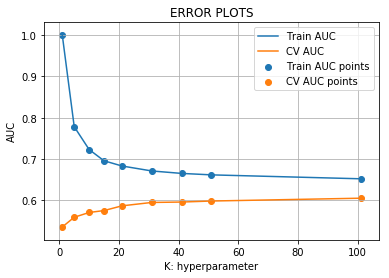

Wall time: 28min 42s


In [56]:
%%time
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score


train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51, 101]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X1, y_train)

    y_train_pred = batch_predict(neigh, X1)    
    y_cv_pred = batch_predict(neigh, X3)

    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


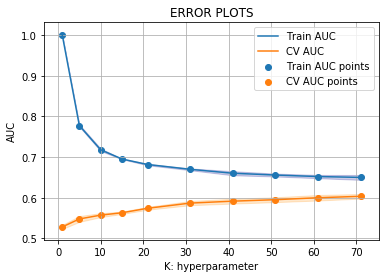

Wall time: 49min 7s


In [57]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

neigh1 = KNeighborsClassifier()
parameters = {'n_neighbors':[1, 5, 10, 15, 21, 31, 41, 51,61,71]}
clf1 = GridSearchCV(neigh1, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf1.fit(X1, y_train)

train_auc= clf1.cv_results_['mean_train_score']
train_auc_std= clf1.cv_results_['std_train_score']
cv_auc = clf1.cv_results_['mean_test_score'] 
cv_auc_std= clf1.cv_results_['std_test_score']

plt.plot(parameters['n_neighbors'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['n_neighbors'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['n_neighbors'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_neighbors'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [58]:
best_k = 51

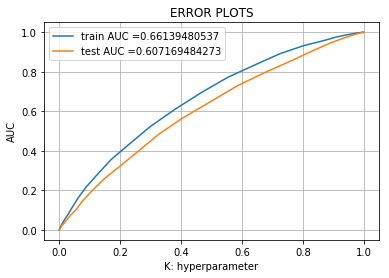

In [59]:
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X1)    
y_test_pred = batch_predict(neigh, X2) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

Confusion Matrix of train set:
 [ [TN  FP]
 [FN TP] ]



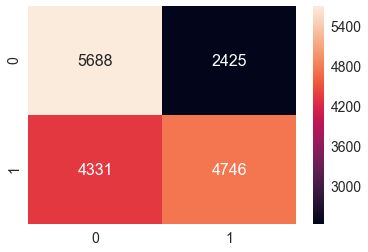

In [61]:
#https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

y_pred_new = neigh.predict(X1)

print("Confusion Matrix of train set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_train, y_pred_new), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

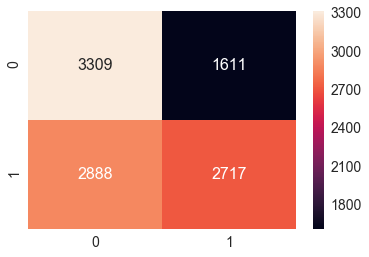

In [62]:
y_pred_new = neigh.predict(X2)

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_new), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.2 Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

In [63]:
# Please write all the code with proper documentation
from scipy.sparse import hstack
X4 = hstack((categories_one_hot_train, sub_categories_one_hot_train, X_train_state_ohe, X_train_teacher_onehotencode, project_grade_category_onehot_encoder_train, price_standardized_train, text_tfidf_train, title_tfidf_train)).tocsr()
X5 = hstack((categories_one_hot_test, sub_categories_one_hot_test, X_test_state_ohe, X_test_teacher_onehotencode, project_grade_category_onehot_encoder_test, price_standardized_test, text_tfidf_test, title_tfidf_test)).tocsr()
X6 = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, X_cv_state_ohe, X_cv_teacher_onehotencode, project_grade_category_onehot_encoder_cv, price_standardized_cv, text_tfidf_cv, title_tfidf_cv)).tocsr()
print("Final Data matrix")
print(X1.shape, y_train.shape)
print(X3.shape, y_cv.shape)
print(X2.shape, y_test.shape)

Final Data matrix
(17190, 8622) (17190,)
(7368, 8622) (7368,)
(10525, 8622) (10525,)


In [64]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

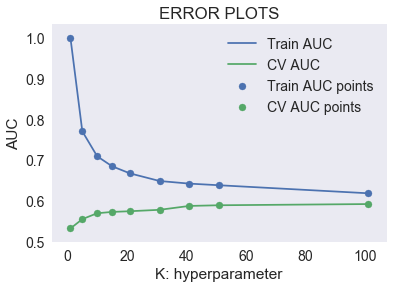

Wall time: 33min 19s


In [65]:
%%time
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score


train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51, 101]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X4, y_train)

    y_train_pred = batch_predict(neigh, X4)    
    y_cv_pred = batch_predict(neigh, X6)

    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

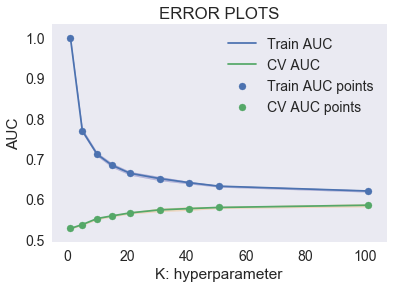

Wall time: 37min 58s


In [66]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier()
parameters = {'n_neighbors':[1, 5, 10, 15, 21, 31, 41, 51, 101]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X4, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(parameters['n_neighbors'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['n_neighbors'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['n_neighbors'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_neighbors'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [67]:
best_k = 101

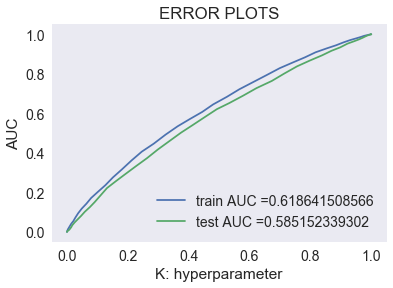

In [68]:
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X4, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X4)    
y_test_pred = batch_predict(neigh, X5) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Confusion Matrix of train set:
 [ [TN  FP]
 [FN TP] ]



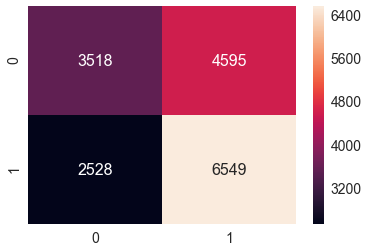

In [69]:
#https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

y_pred_new = neigh.predict(X4)

print("Confusion Matrix of train set:\n [ [TN  FP]\n [FN TP] ]\n")

df_cm = pd.DataFrame(confusion_matrix(y_train, y_pred_new), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

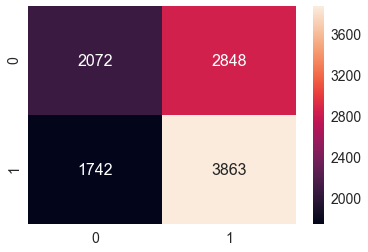

In [70]:
y_pred_new = neigh.predict(X5)

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_new), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

In [71]:
# Please write all the code with proper documentation
from scipy.sparse import hstack
X1 = hstack((categories_one_hot_train, sub_categories_one_hot_train, X_train_state_ohe, X_train_teacher_onehotencode, project_grade_category_onehot_encoder_train, price_standardized_train, avg_w2v_vectors_train, avg_w2v_vectors_train_title)).tocsr()
X2 = hstack((categories_one_hot_test, sub_categories_one_hot_test, X_test_state_ohe, X_test_teacher_onehotencode, project_grade_category_onehot_encoder_test, price_standardized_test, avg_w2v_vectors_test, avg_w2v_vectors_test_title)).tocsr()
X3 = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, X_cv_state_ohe, X_cv_teacher_onehotencode, project_grade_category_onehot_encoder_cv, price_standardized_cv, avg_w2v_vectors_cv, avg_w2v_vectors_cv_title)).tocsr()
print("Final Data matrix")
print(X1.shape, y_train.shape)
print(X3.shape, y_cv.shape)
print(X2.shape, y_test.shape) 

Final Data matrix
(17190, 700) (17190,)
(7368, 700) (7368,)
(10525, 700) (10525,)


In [72]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

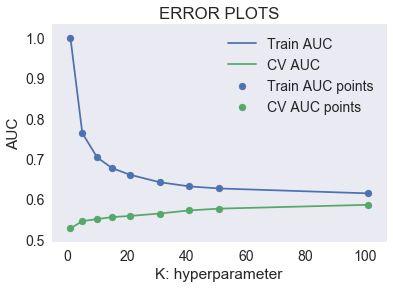

Wall time: 1h 27min 39s


In [73]:
%%time
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score


train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51, 101]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X1, y_train)

    y_train_pred = batch_predict(neigh, X1)    
    y_cv_pred = batch_predict(neigh, X3)

    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

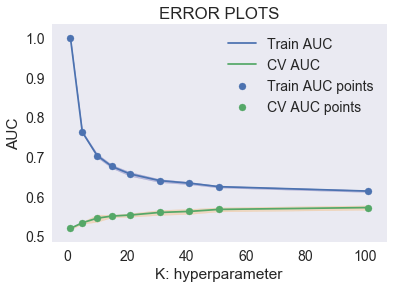

Wall time: 1h 44min 16s


In [74]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier()
parameters = {'n_neighbors':[1, 5, 10, 15, 21, 31, 41, 51, 101]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf.fit(X1, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(parameters['n_neighbors'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['n_neighbors'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['n_neighbors'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_neighbors'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [75]:
best_k = 51

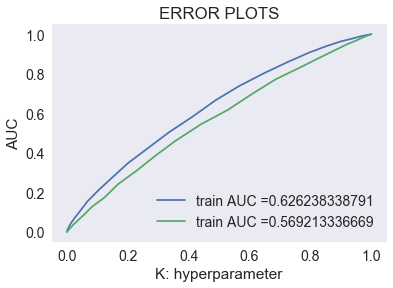

In [76]:
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X1)    
y_test_pred = batch_predict(neigh, X2) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Confusion Matrix of train set:
 [ [TN  FP]
 [FN TP] ]



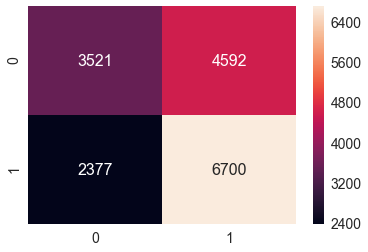

In [77]:
#https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

y_pred_new = neigh.predict(X1)

print("Confusion Matrix of train set:\n [ [TN  FP]\n [FN TP] ]\n")

df_cm = pd.DataFrame(confusion_matrix(y_train, y_pred_new), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

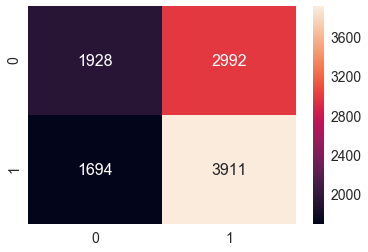

In [78]:
y_pred_new = neigh.predict(X2)

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_new), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.4 Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

In [79]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
# Please write all the code with proper documentation
# Please write all the code with proper documentation
from scipy.sparse import hstack
X1 = hstack((categories_one_hot_train, sub_categories_one_hot_train, X_train_state_ohe, X_train_teacher_onehotencode, project_grade_category_onehot_encoder_train, price_standardized_train, text_tfidf_train, title_tfidf_train)).tocsr()
X2 = hstack((categories_one_hot_test, sub_categories_one_hot_test, X_test_state_ohe, X_test_teacher_onehotencode, project_grade_category_onehot_encoder_test, price_standardized_test, text_tfidf_test, title_tfidf_test)).tocsr()
X3 = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, X_cv_state_ohe, X_cv_teacher_onehotencode, project_grade_category_onehot_encoder_cv, price_standardized_cv, text_tfidf_cv, title_tfidf_cv)).tocsr()
print("Final Data matrix")
print(X1.shape, y_train.shape)
print(X3.shape, y_cv.shape)
print(X2.shape, y_test.shape)

Final Data matrix
(17190, 8622) (17190,)
(7368, 8622) (7368,)
(10525, 8622) (10525,)


In [80]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

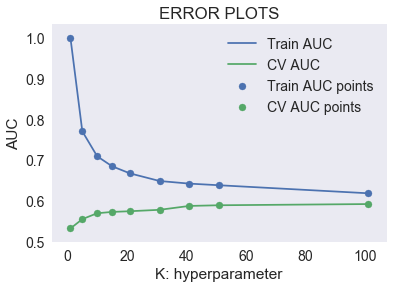

Wall time: 15min 47s


In [81]:
%%time
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score


train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51, 101]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X1, y_train)

    y_train_pred = batch_predict(neigh, X1)    
    y_cv_pred = batch_predict(neigh, X3)

    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

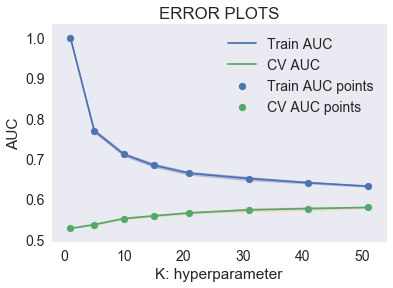

Wall time: 18min 40s


In [82]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier()
parameters = {'n_neighbors':[1, 5, 10, 15, 21, 31, 41, 51]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X1, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(parameters['n_neighbors'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['n_neighbors'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['n_neighbors'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_neighbors'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [83]:
best_k = 51

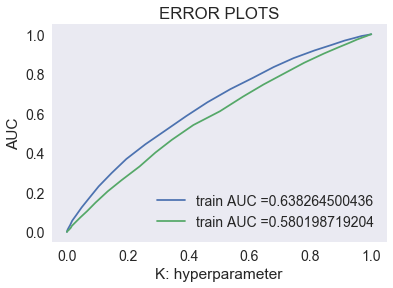

In [84]:
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X1)    
y_test_pred = batch_predict(neigh, X2) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Confusion Matrix of train set:
 [ [TN  FP]
 [FN TP] ]



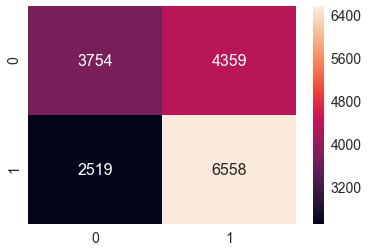

In [85]:
#https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

y_pred_new = neigh.predict(X1)

print("Confusion Matrix of train set:\n [ [TN  FP]\n [FN TP] ]\n")

df_cm = pd.DataFrame(confusion_matrix(y_train, y_pred_new), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

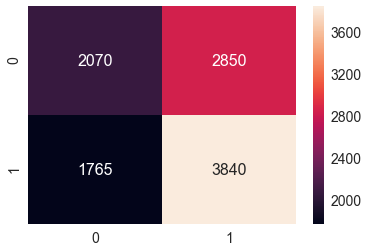

In [86]:
y_pred_new = neigh.predict(X2)

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_new), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

<h2>2.5 Feature selection with `SelectKBest` </h2>

In [87]:
project_data.head(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity
0,167849,p021272,9bb81d54ea23ff99413a140f17844b6f,Ms.,AZ,2017-01-16 15:55:38,Grades PreK-2,,My students need more technology in the classr...,1,1,Literacy_Language Math_Science,Literacy Mathematics,"Hi everyone, my students are in a self-contain...",109.94,8
1,39634,p087360,3551aa80b2fb43ec49e995120832c52d,Mrs.,MN,2016-05-12 15:29:48,Grades 6-8,,My students need TI-83 Graphing Calculators to...,0,1,Math_Science,Mathematics,"MATH MATH MATH\r\n\""We are each uni...",181.95,10
2,70350,p104396,b73bc37b167adc024bb8edb4cc14cde3,Mrs.,CA,2016-08-14 14:48:56,Grades PreK-2,,"My students need a ABC bowling set, a water an...",57,1,Health_Sports Literacy_Language,Health_Wellness Literacy,I teach in a high poverty area of Los Angeles....,739.94,8


In [88]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
#https://www.kaggle.com/jepsds/feature-selection-using-selectkbest?utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com
# Please write all the code with proper documentation
# Please write all the code with proper documentation
from scipy.sparse import hstack
X1 = hstack((categories_one_hot_train, sub_categories_one_hot_train, X_train_state_ohe, X_train_teacher_onehotencode, project_grade_category_onehot_encoder_train, price_standardized_train, text_tfidf_train, title_tfidf_train)).tocsr()
X2 = hstack((categories_one_hot_test, sub_categories_one_hot_test, X_test_state_ohe, X_test_teacher_onehotencode, project_grade_category_onehot_encoder_test, price_standardized_test, text_tfidf_test, title_tfidf_test)).tocsr()
X3 = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, X_cv_state_ohe, X_cv_teacher_onehotencode, project_grade_category_onehot_encoder_cv, price_standardized_cv, text_tfidf_cv, title_tfidf_cv)).tocsr()
print("Final Data matrix")
print(X1.shape, y_train.shape)
print(X3.shape, y_cv.shape)
print(X2.shape, y_test.shape)

Final Data matrix
(17190, 8622) (17190,)
(7368, 8622) (7368,)
(10525, 8622) (10525,)


In [89]:
# Import SelectKBest, chi2(score function for classification)
from sklearn.feature_selection import SelectKBest, f_classif

# Create the object for SelectKBest and fit and transform the classification data
# k is the number of features you want to select [here it's 2]
X1 = SelectKBest(f_classif,k=2000).fit_transform(X1,y_train)
X2 = SelectKBest(f_classif,k=2000).fit_transform(X2,y_test)
X3 = SelectKBest(f_classif,k=2000).fit_transform(X3,y_cv)

In [90]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k = 2000 )
selector.fit(X4,y_train)
X4_2000 = selector.transform(X4)
X5_2000 = selector.transform(X5)
X6_2000 = selector.transform(X6)
print(X4_2000.shape)
print(X5_2000.shape)
print(X6_2000.shape)

(17190, 2000)
(10525, 2000)
(7368, 2000)


In [91]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

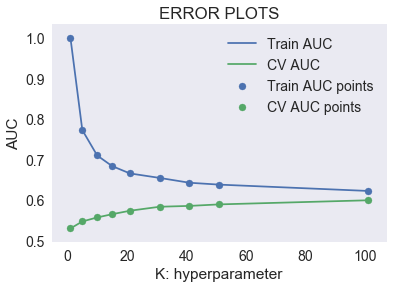

Wall time: 11min 39s


In [92]:
%%time
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score


train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51, 101]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X4_2000, y_train)

    y_train_pred = batch_predict(neigh, X4_2000)    
    y_cv_pred = batch_predict(neigh, X6_2000)

    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

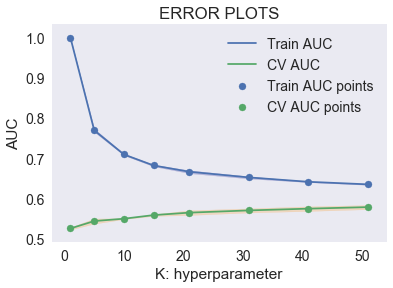

Wall time: 13min 58s


In [93]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier()
parameters = {'n_neighbors':[1, 5, 10, 15, 21, 31, 41, 51]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X4_2000, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(parameters['n_neighbors'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['n_neighbors'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['n_neighbors'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_neighbors'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [94]:
best_k = 51

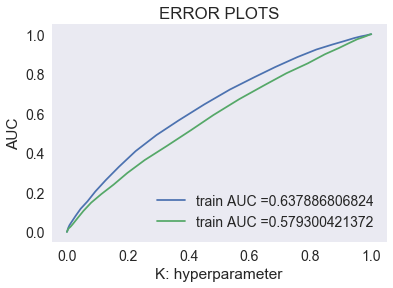

In [95]:
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X4_2000, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X4_2000)    
y_test_pred = batch_predict(neigh, X5_2000) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Confusion Matrix of train set:
 [ [TN  FP]
 [FN TP] ]



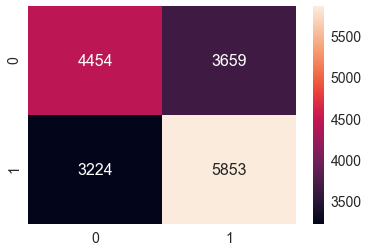

In [96]:
#https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

y_pred_new = neigh.predict(X4_2000)

print("Confusion Matrix of train set:\n [ [TN  FP]\n [FN TP] ]\n")

df_cm = pd.DataFrame(confusion_matrix(y_train, y_pred_new), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

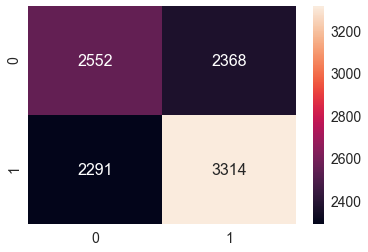

In [97]:
y_pred_new = neigh.predict(X5_2000)

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_new), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

<h1>3. Conclusions</h1>

In [99]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper Parameter'('k')'","AUC"]
x.add_row(['BOW','Brute-force KNN', 51,0.66139])
x.add_row(['TF-IDF','Brute-force KNN', 101,0.61864])
x.add_row(['AVG W2V','Brute-force KNN', 51,0.6555])
x.add_row(['TF-IDF W2V','Brute-force KNN', 51,0.62623])
x.add_row(['TF-IDF after selectKbest','Brute-force KNN', 51,0.68386])
print(x)

+--------------------------+-----------------+------------------------+---------+
|        Vectorizer        |      Model      | Hyper Parameter'('k')' |   AUC   |
+--------------------------+-----------------+------------------------+---------+
|           BOW            | Brute-force KNN |           51           | 0.66139 |
|          TF-IDF          | Brute-force KNN |          101           | 0.61864 |
|         AVG W2V          | Brute-force KNN |           51           |  0.6555 |
|        TF-IDF W2V        | Brute-force KNN |           51           | 0.62623 |
| TF-IDF after selectKbest | Brute-force KNN |           51           | 0.68386 |
+--------------------------+-----------------+------------------------+---------+
